# Homework 1

**The following notebook is meant to help you work through Problems 1, 2, and 3 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [3]:
# loading data

import numpy as np
import matplotlib.pyplot as plt
from cmath import exp
import pandas as pd
train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

from T1_P1_TestCases import test_p1
from T1_P2_TestCases import test_p2

# Problem 1

## Problem 1 Subpart 1

In [4]:
def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_array.

    :param x_array: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param y_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    '''Initialize df to store similarities and similarities * y'''
    df = pd.DataFrame()
    for x_test in x_new:
        df[str(x_test)] = [0] * len(year_train)
    
    df_y = pd.DataFrame()
    for x_test in x_new:
        df_y[str(x_test)] = [0] * len(year_train)
    
    ''' Similarity function'''
    for col in df.columns:
        for i in range(0,len(x_train)):
            # print(exp(-(((x_train[i])-float(col))**2/tau)))
            df[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))
            df_y[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))*y_train[i]
    
    '''Initialize dict to store knn regressors'''
    list = []
    

    ''' Caclculate prediction numerator'''   
    for col in df.columns:
            list.append(df_y[col].sum()/df[col].sum())
    
    return list

kernel_regressor(year_test, 10, year_train, temp_train)

/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))*y_train[i]


[(5.681990068718417+0j),
 (0.5920433700728368+0j),
 (-3.6039279917850497+0j),
 (-3.718430211140386+0j),
 (-3.184020837773473+0j),
 (-1.2338842215992667+0j),
 (-0.3695607831634109+0j),
 (-0.3695609680704842+0j),
 (-0.4595618757265753+0j),
 (-0.4598343710998445+0j),
 (2.86532054187987+0j),
 (1.0690933072901967+0j),
 (1.7052245874848202+0j),
 (2.3642516248822414+0j),
 (-4.006640814947246+0j),
 (-2.3743788328664985+0j),
 (-1.8774949496114484+0j),
 (2.6344677874998585+0j),
 (-0.6001024061676553+0j),
 (-3.8286626347656347+0j),
 (-2.5399334468163794+0j),
 (2.7577930714518737+0j),
 (3.399798593229597+0j),
 (-4.295114423894769+0j),
 (-4.299560781458666+0j)]

In [5]:
test_p1(kernel_regressor)

Passed


/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))*y_train[i]
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(x_test)] = [0] * len(year_train)
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(x_test)] = [0] * len(year_train)
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

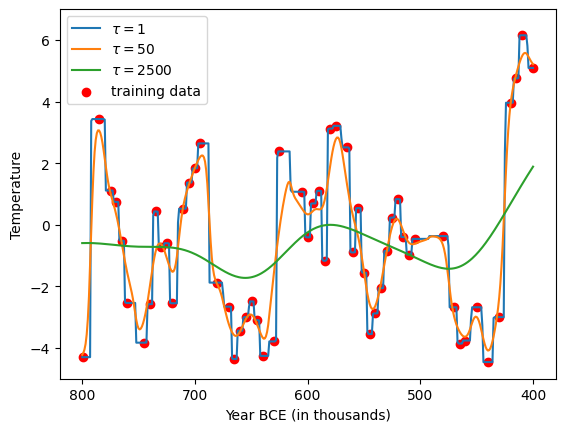

In [6]:
# plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("images/p1.2.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 4

In [7]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    ''' initialize MSE'''
    mse = 0

    ''' calculate'''
    for i in range(0,len(true)):
        mse += (true[i]-predictions[i])**2
    
    return mse/len(true)

In [8]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_test, tau, year_train, temp_train), temp_test)}")

/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))*y_train[i]


tau = 1: loss = (1.9472621565209178+0j)


/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))*y_train[i]


tau = 50: loss = (1.858289916961345+0j)
tau = 2500: loss = (8.333886806980795+0j)


/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/2018427275.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/tau))*y_train[i]


# Problem 2

## Problem 2 Subpart 1

In [9]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """

    '''Initialize df to store similarities and list to store knn'''
    df2 = pd.DataFrame()
    for x_test in x_new:
        df2[str(x_test)] = [0] * len(x_train)
    
    list_knn = []

    ''' Similarity function'''
    for col in df2.columns:
        for i in range(0,len(x_train)):
            df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))
            # print(df2[col].iloc[i])


    '''Sort Each Colummn'''
    for col in df2.columns:
        df_temp = df2.sort_values(by=col, ascending=False)
        knn = 0
        for x in df_temp[col].tolist()[0:k]:
            # print(df2[col].tolist().index(x))
            knn += y_train[df2[col].tolist().index(x)]
        list_knn.append(knn/k)

    return list_knn

predict_knn(year_test, 10, year_train, temp_train)

/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))


[-0.04856078160124451,
 -0.04856078160124468,
 -0.04856078160124459,
 -0.594560781601245,
 -0.5945607816012449,
 -1.8805607816012446,
 -1.4115607816012445,
 -1.2285607816012445,
 -1.2285607816012447,
 -1.0585607816012446,
 0.3994392183987552,
 0.19443921839875528,
 -0.9975607816012447,
 -1.180560781601245,
 -2.139560781601245,
 -1.5085607816012447,
 -1.1525607816012446,
 -0.9125607816012448,
 -0.3495607816012447,
 -1.1065607816012448,
 -0.5085607816012446,
 -0.8785607816012447,
 -0.8785607816012447,
 -0.8785607816012447,
 -0.8785607816012447]

In [10]:
test_p2(predict_knn)

/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))


Passed


/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))


/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[str(x_test)] = [0] * len(x_train)
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[str(x_test)] = [0] * len(x_train)
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

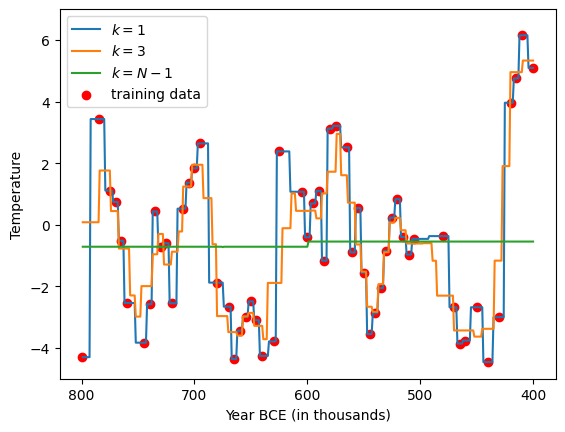

In [11]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("images/p2.1.png", bbox_inches = "tight")
plt.show()

## Problem 2 Subpart 4

In [12]:
# choose your value of k and calculate the loss
for k in [1, 3, 55]:
    print(model_mse(predict_knn(year_test, k, year_train, temp_train), temp_test))

/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].iloc[i] = exp(-(((x_train[i])-float(col))**2/2500))
/var/folders/5_/bssq6jn101x6t5j7wnmkdw680000gn/T/ipykernel_1003/3176486816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

1.7406000000000004
3.8907662222222212
9.663973240330577


# Problem 3

## Problem 3 Subpart 1

In [13]:
## don't change anything here
def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X
###

In [14]:
# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`
def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  phi_X = []
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  if part == 'a':

    for x in X:
      temp = []
      for i in range(0,10):
        if i == 0:
          temp.append(1)
        else:
          temp.append( x ** i )
      phi_X.append(temp)
    # print(np.shape(phi_X))
    return np.array(phi_X)
    pass

  elif part=='b':
    for x in X:
      temp = []
      for i in range(0,10):
        if i == 0:
          temp.append(1)
        else:
          temp.append(exp(-(x-((i+7)/8))**2/5))
      phi_X.append(temp)
    # print(np.shape(phi_X))
    return np.array(phi_X)
    pass

  elif part=='c':
    for x in X:
      temp = []
      for i in range(0,10):
        if i == 0:
          temp.append(1)
        else:
          temp.append(np.cos(x/i))
      phi_X.append(temp)
    # print(np.shape(phi_X))
    # print(np.array(phi_X))
    return np.array(phi_X)
    pass
  
  elif part=='d':
    for x in X:
      temp = []
      for i in range(0,50):
        if i == 0:
          temp.append(1.0)
        else:
          temp.append(np.cos(x/i))
      phi_X.append(temp)
    # print(np.shape(phi_X))
    return np.array(phi_X)
    pass

make_basis(year_train, part='c')

array([[ 1.        ,  0.49483174, -0.86453217, -0.17169215,  0.2602574 ,
         0.97789918,  0.64354792,  0.98870362, -0.79380646,  0.83585138],
       [ 1.        ,  0.95122418,  0.98773078,  0.9945408 ,  0.99692798,
         0.24879508,  0.99863427,  0.58784801, -0.9992317 ,  0.99939293],
       [ 1.        , -0.9928458 ,  0.05980885,  0.53414423,  0.72794534,
        -0.28616441,  0.87582653,  0.23915735, -0.9295013 ,  0.94415785],
       [ 1.        ,  0.89025846, -0.97217757, -0.35785595,  0.11794581,
        -0.74989345,  0.56663218, -0.15620234, -0.74764491,  0.7987455 ],
       [ 1.        ,  0.46366773,  0.85547289, -0.77485611, -0.96319076,
        -0.91688735, -0.33551743, -0.82288715, -0.13566362,  0.29121421],
       [ 1.        , -0.26258076, -0.60721464,  0.81840638, -0.44316214,
        -0.05311416, -0.95352147, -0.98266981,  0.52765418, -0.31413376],
       [ 1.        , -0.96168405,  0.13841233,  0.4178038 ,  0.75445753,
         0.84040011, -0.84196312, -0.59198912

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [15]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

/Users/doug/.pyenv/versions/3.10.1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


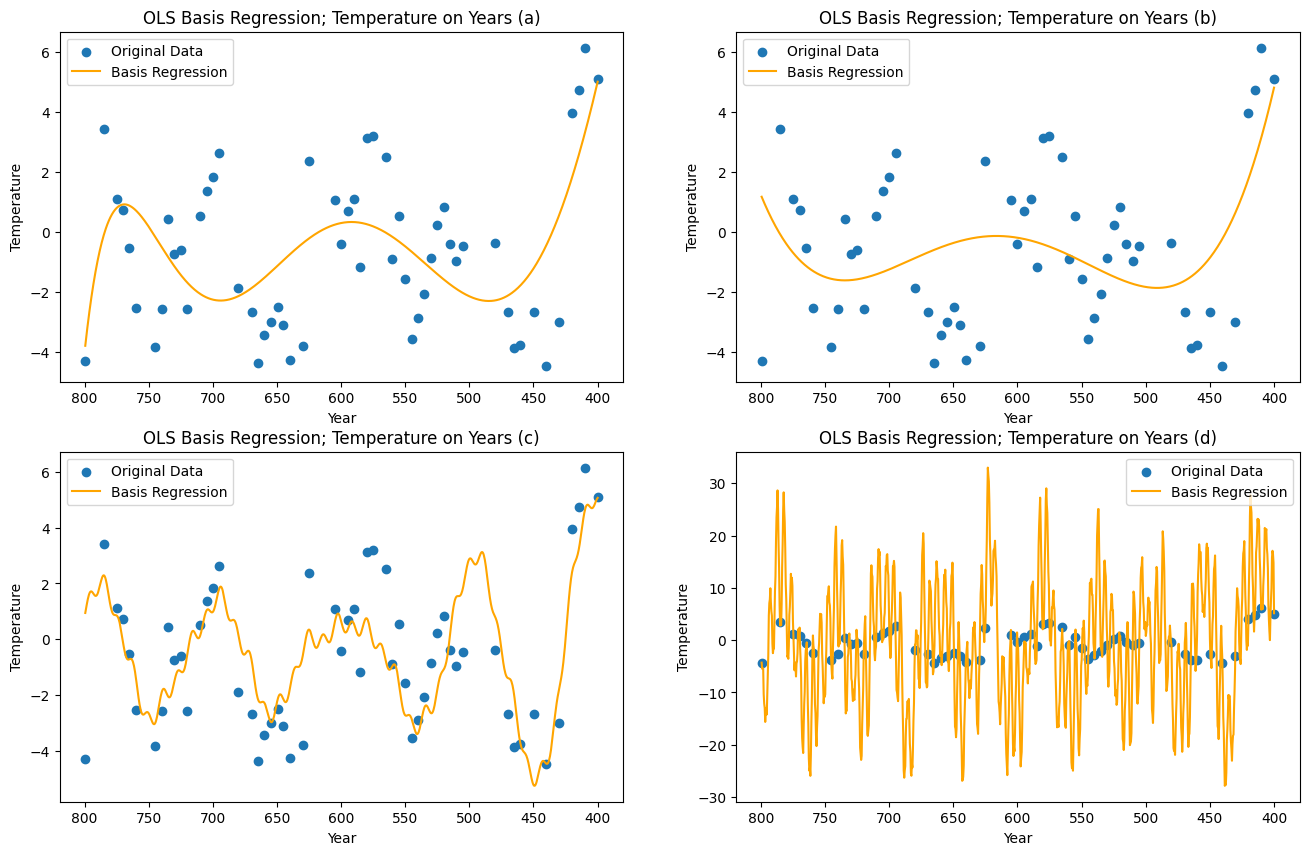

In [16]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")
  ax[i//2, i%2].invert_xaxis()

  xs = np.linspace(year_train.min(), year_train.max(), 1000)
  ys = np.linspace(temp_train.min(), temp_train.max(), 1000)
  transform_xs = make_basis(xs, part)

  y_pred = []
  
  for arr in transform_xs:
    y_pred.append(np.dot(arr,find_weights(make_basis(year_train,part), temp_train)))
  #   print(np.shape(arr))
  #   print(np.shape(find_weights(transform_xs, ys)))
  
  # print(y_pred)

  ax[i//2, i%2].plot(xs, y_pred, color = 'orange', label = "Basis Regression")


  ax[i//2, i%2].legend()

plt.savefig("images/p3.1.png")
  


## Problem 3 Subpart 2

In [17]:
def mean_squared_error(X,y, w):
  mse = 1/len(X) * np.sum((y - np.dot(X,w)) * (y - np.dot(X,w)))
  return mse

def sigma_mle(X,y,w):
  sum=0
  for i in range(len(y)):
    sum += (np.dot(w.T, X[i])- y[i]) ** 2 
  # print(np.sqrt(1/len(X)* sum))
  return np.sqrt(1/len(X)* sum)

def negative_log_likelihood(X,y,w, sigma):

  nll = 0
  # asdf = []
  for i in range(len(y)):
    nll += np.log(1/(sigma*np.sqrt(2*np.pi)))-((y[i] - np.dot(w.T, X[i]))**2/(2*sigma**2))
    # print(nll)
    # asdf.append(nll)

  # print(asdf)
  return -nll
  pass


In [18]:
for part in ['a','b','c','d']:
  # TODO: compute the MSE and Likelihood and print the results

  train_mse = mean_squared_error(make_basis(year_train, part), temp_train, find_weights(make_basis(year_train,part), temp_train))
  test_mse = mean_squared_error(make_basis(year_test, part), temp_test, find_weights(make_basis(year_train,part), temp_train))
  
  print(f"\nPart ({part});\n\n Train MSE: {train_mse:.2f}; Test MSE: {test_mse:.2f}\n")
  
  # TODO: compute the likelihood. 
  train_log_nll = negative_log_likelihood(make_basis(year_train, part), temp_train, find_weights(make_basis(year_train,part), temp_train), sigma_mle(make_basis(year_train,part), temp_train, find_weights(make_basis(year_train,part), temp_train))) 
  test_log_nll = negative_log_likelihood(make_basis(year_test, part), temp_test, find_weights(make_basis(year_train, part), temp_train), sigma_mle(make_basis(year_train,part), temp_train, find_weights(make_basis(year_train,part), temp_train)) )
  print(f" Train Negative Log-Likelihood: {train_log_nll:.3f}; Test Negative Log-Likelihood: {test_log_nll:.3f}")


Part (a);

 Train MSE: 4.83; Test MSE: 7.96

 Train Negative Log-Likelihood: 125.768; Test Negative Log-Likelihood: 63.256

Part (b);

 Train MSE: 5.53+0.00j; Test MSE: 8.71+0.00j

 Train Negative Log-Likelihood: 129.620-0.000j; Test Negative Log-Likelihood: 64.035-0.000j

Part (c);

 Train MSE: 2.88; Test MSE: 5.97

 Train Negative Log-Likelihood: 111.018; Test Negative Log-Likelihood: 62.098

Part (d);

 Train MSE: 0.64; Test MSE: 58.89

 Train Negative Log-Likelihood: 68.303; Test Negative Log-Likelihood: 1161.803
